# Projekt LAB 1 Dane Facebook 
Maciej Klimiuk , Hanna Mika



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics._regression import root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [23]:
# Wczytaj dane
data = pd.read_csv("data.csv", sep=";")
# nowa kolumna o nazwie koszty = przychód - zysk
data["Koszty w mln $"] = data["Przychód w mln $"] - data["Zysk w mln $"]
print(data)

user_count_q = {
    'Q':
        ['Q3 08', 'Q1 09', 'Q2 09', 'Q3 09', 'Q4 09', 'Q1 10',
         'Q2 10', 'Q3 10', 'Q4 10', 'Q1 11', 'Q2 11', 'Q3 11',
         'Q4 11', 'Q1 12', 'Q2 12', 'Q3 12', 'Q4 12', 'Q1 13',
         'Q2 13', 'Q3 13', 'Q4 13', 'Q1 14', 'Q2 14', 'Q3 14',
         'Q4 14', 'Q1 15', 'Q2 15', 'Q3 15', 'Q4 15', 'Q1 16',
         'Q2 16', 'Q3 16', 'Q4 16', 'Q1 17', 'Q2 17', 'Q3 17', 'Q4 17'],
    'User count':
        [100, 197, 242, 305, 360, 431, 482, 550, 608, 680, 739, 800,
         845, 901, 955, 1007, 1056, 1110, 1155, 1189, 1228, 1276, 1317,
         1350, 1393, 1441, 1490, 1545, 1591, 1654, 1712, 1788, 1860, 1936,
         2006, 2072, 2129]
}
user_count_q_transformed = {
    'Q': list(range(2, 39)),
    'User count': user_count_q['User count']
}
# zmien q[0] na 1
user_count_q_transformed['Q'][0] = 1
print(user_count_q_transformed)
# dlugosc danych
print(len(user_count_q_transformed['Q']))

# przekształcenie słownika na DataFrame
data_user_count_q = pd.DataFrame(user_count_q_transformed)



     Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  Użytkownicy_mln  \
0   2007               153          -138           450                0   
1   2008               272           -56           850                0   
2   2009               777           229          1218              360   
3   2010              1974           606          2127              608   
4   2011              3711          1000          3200              845   
5   2012              5089            53          4619             1056   
6   2013              7872          1500          6337             1228   
7   2014             12466          2940          9199             1393   
8   2015             17928          3688         12691             1591   
9   2016             27638         10217         17048             1860   
10  2017             40653         15934         25105             2129   

    Koszty w mln $  
0              291  
1              328  
2              548  
3             1

In [24]:
#(2018-2022) - przychód, zysk, koszty, zatrudnienie, liczba użytkowników
Liczba_urzytkownikow_od_q = {
    'Q':
        ['Q1 18', 'Q2 18', 'Q3 18', 'Q4 18',
         'Q1 19', 'Q2 19', 'Q3 19', 'Q4 19',
         'Q1 20', 'Q2 20', 'Q3 20', 'Q4 20',
         'Q1 21', 'Q2 21', 'Q3 21', 'Q4 21',
         'Q1 22', 'Q2 22', 'Q3 22', 'Q4 22',
         'Q1 23', 'Q2 23', 'Q3 23', 'Q4 23',],
    'Użytkownicy_mln':
        [2196, 2234, 2271, 2320, 2375, 2414, 2449, 2498, 2603, 2701, 2740, 2797,
         2853, 2895, 2910, 2912, 2936, 2934, 2958, 2963, 2989, 3030, 3049, 3065]
}

fb_future = {
    'Rok': [2018, 2019, 2020, 2021, 2022, 2023],
    'Przychod': [55838, 70697, 85965, 117929, 116609, 134902],
    'Profit': [22112, 18485, 29146, 39370, 23200, 39098],
    'Koszty w mln $': [33726, 52212, 56819, 78559, 93409, 95804],
    'Zatrudnienie': [35587, 44942, 58604, 71970, 87314, 67317],
    'ilosc_uzytkownikow': [2320, 2498, 2797, 2912, 2963, 3065]
}

Liczba_urzytkownikow_od_q_ponumerowana = {
    'Q': list(range(39, 63)),
    'User count': Liczba_urzytkownikow_od_q['Użytkownicy_mln']
}
print(Liczba_urzytkownikow_od_q_ponumerowana)

# przekształcenie słownika na DataFrame
data_future1 = pd.DataFrame(Liczba_urzytkownikow_od_q_ponumerowana)
data_future = pd.DataFrame(fb_future)
print(data_future)


{'Q': [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], 'User count': [2196, 2234, 2271, 2320, 2375, 2414, 2449, 2498, 2603, 2701, 2740, 2797, 2853, 2895, 2910, 2912, 2936, 2934, 2958, 2963, 2989, 3030, 3049, 3065]}
    Rok  Przychod  Profit  Koszty w mln $  Zatrudnienie  ilosc_uzytkownikow
0  2018     55838   22112           33726         35587                2320
1  2019     70697   18485           52212         44942                2498
2  2020     85965   29146           56819         58604                2797
3  2021    117929   39370           78559         71970                2912
4  2022    116609   23200           93409         87314                2963
5  2023    134902   39098           95804         67317                3065


In [25]:
# wszystkie korelacje
print(data.corr())

# wysietlenie informacji o danych statycztycznych
print(data.describe())

                       Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  \
Rok               1.000000          0.892709      0.800024      0.917137   
Przychód w mln $  0.892709          1.000000      0.977588      0.997597   
Zysk w mln $      0.800024          0.977588      1.000000      0.962063   
Zatrudnienie      0.917137          0.997597      0.962063      1.000000   
Użytkownicy_mln   0.996088          0.893330      0.805706      0.916392   
Koszty w mln $    0.930780          0.991064      0.940772      0.997032   

                  Użytkownicy_mln  Koszty w mln $  
Rok                      0.996088        0.930780  
Przychód w mln $         0.893330        0.991064  
Zysk w mln $             0.805706        0.940772  
Zatrudnienie             0.916392        0.997032  
Użytkownicy_mln          1.000000        0.928180  
Koszty w mln $           0.928180        1.000000  
               Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  \
count    11.000000         11.00000

In [26]:
# wykresy

fig = px.scatter_matrix(data)
fig.show()


In [27]:
from sklearn.metrics import mean_absolute_error, r2_score


def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)
def calculate_me(y_true, y_pred):
    return np.mean(y_true - y_pred)
def calculate_mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)
def calculate_u2(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
def calculate_um(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum(np.abs(y_true - np.mean(y_true)))
def calculate_ur(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) ** 2)
def calculate_ud(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) / 2)



Współczynniki modelu R^2:  0.9916282239778179
Współczynnik ME -848.8451841488071
Współczynnik RMSE 1581.637245853042
Współczynnik MAE 1374.7588626241352
Współczynnik MPE -0.03134331746545647
Współczynnik MAPE 0.06827545780782503 



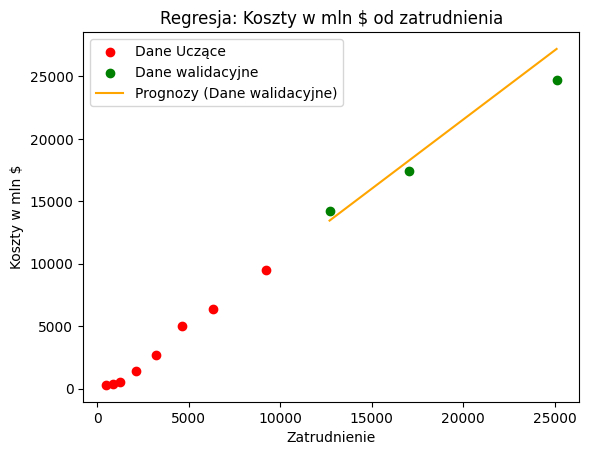

wspolczynnik ME -2010.4071003800764
wspolczynnik RMSE 4052.273034954554
wspolczynnik MAE 3288.1313387060454
wspolczynnik MPE -0.05300270460398418
wspolczynnik MAPE 0.09090429532769095


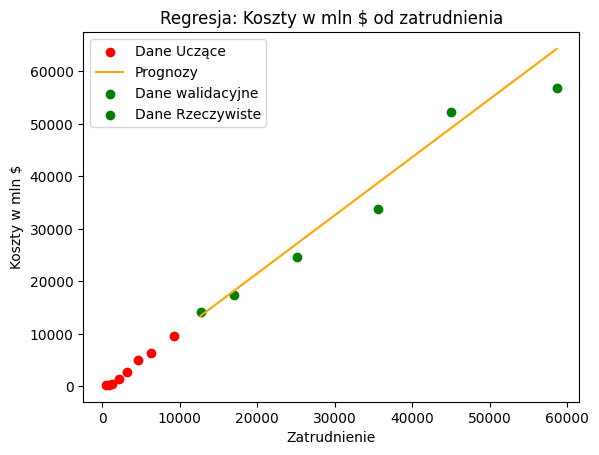

wspolczynnik ME 729.9639718895984
wspolczynnik RMSE 8053.628044205432
wspolczynnik MAE 4978.956814199499
wspolczynnik MPE -0.013943612821824325
wspolczynnik MAPE 0.08990968896688215
Współczynniki modelu R^2:  0.8265298001748389
Współczynnik ME 9528.276112264184
Współczynnik RMSE 10175.108034132647
Współczynnik MAE 9528.276112264184
Współczynnik MPE 0.49099424861349816
Współczynnik MAPE 0.49099424861349816 



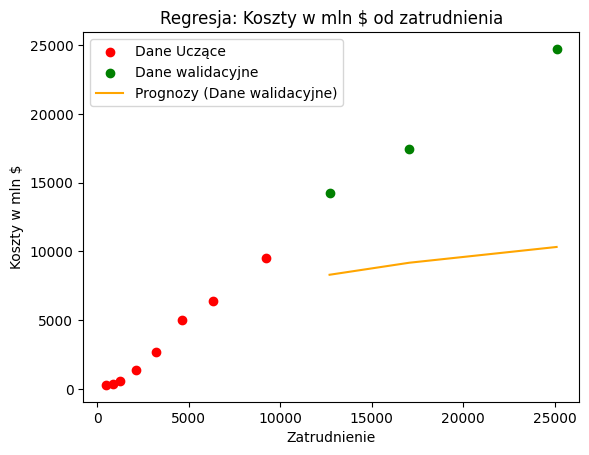

Współczynniki modelu R^2:  0.9232443383758572
Współczynnik ME -22329.718727955038
Współczynnik RMSE 28447.584022083858
Współczynnik MAE 22329.718727955038
Współczynnik MPE -1.0396699820002737
Współczynnik MAPE 1.0396699820002737 



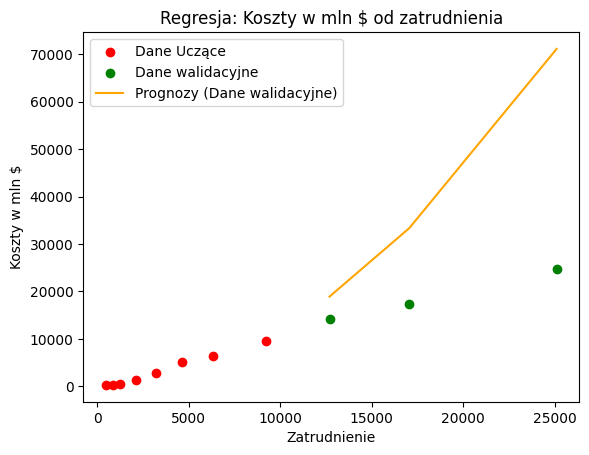

Współczynniki modelu R^2:  0.9916305533738393
Współczynnik ME -984.8750088854753
Współczynnik RMSE 1737.5652465387739
Współczynnik MAE 1486.031613444545
Współczynnik MPE -0.03776184884544809
Współczynnik MAPE 0.07295543062628164 



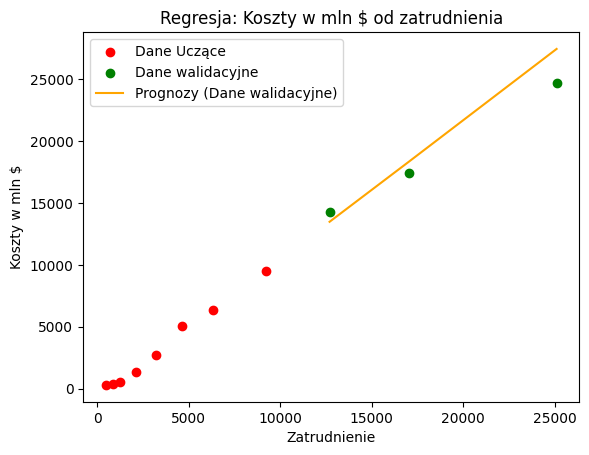

wspolczynnik ME -2688.17305866207
wspolczynnik RMSE 4732.04417113587
wspolczynnik MAE 3593.216285350068
wspolczynnik MPE -0.06849823650446506
wspolczynnik MAPE 0.09862978807075067


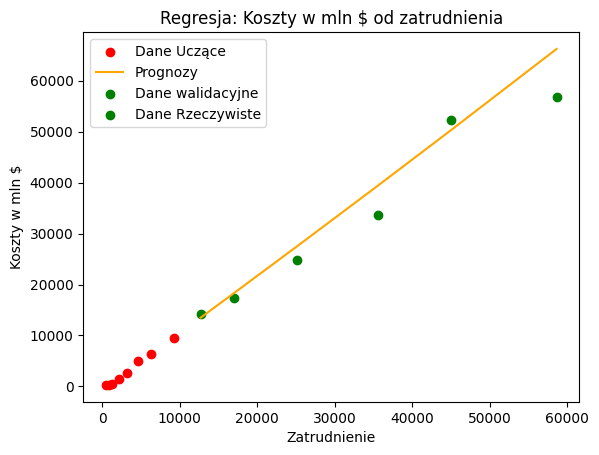

Prognoza dla kwartału 1: 13488.265093161395 +/- 13488.265093161395
Prognoza dla kwartału 2: 18373.141230213463 +/- 18373.141230213463
Prognoza dla kwartału 3: 27473.218703281567 +/- 26850.64379949956
Prognoza dla kwartału 4: 39442.26846477405 +/- 31004.45285111166
Prognoza dla kwartału 5: 50248.60522677461 +/- 34664.03209013642
Prognoza dla kwartału 6: 66240.53963376733 +/- 37972.54461970133
Prognoza dla kwartału 7: 82127.71578660958 +/- 41015.03588983448
Prognoza dla kwartału 8: 100660.75700939544 +/- 43846.91771599928
Prognoza dla kwartału 9: 76569.9116647837 +/- 46506.67927666749
wspolczynnik ME -857.2692014179055
wspolczynnik RMSE 7955.6221797425305
wspolczynnik MAE 5734.873204813524
wspolczynnik MPE -0.037031788783995156
wspolczynnik MAPE 0.10173393027190697


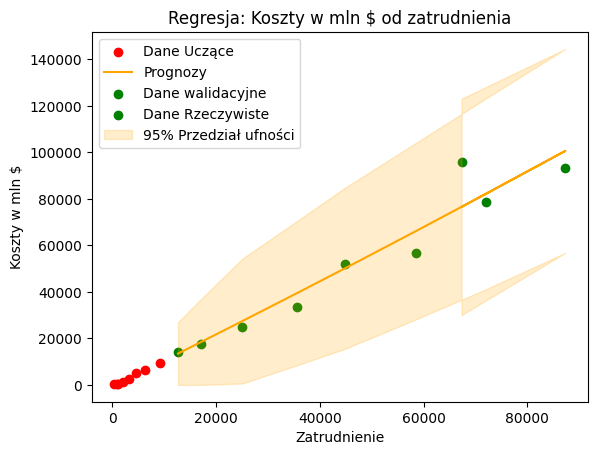

In [28]:
#PRACOWNICY X WZGLĘDEM KOSZTÓW Y
X_uczace_pracownicy = data[["Zatrudnienie"]][:8]
Y_uczace_pracownicy = data["Koszty w mln $"][:8]
X_walidacyjne_pracownicy = data[["Zatrudnienie"]][8:]
Y_walidacyjne_pracownicy = data["Koszty w mln $"][8:]


# trenowanie modelu
model_pracownicy = LinearRegression()
model_pracownicy.fit(X_uczace_pracownicy, Y_uczace_pracownicy)

# prognozy dla danych walidacyjnych
Y_pred_pracownicy = model_pracownicy.predict(X_walidacyjne_pracownicy)

#wyswietl R^2 modelu
print("Współczynniki modelu R^2: ", model_pracownicy.score(X_uczace_pracownicy, Y_uczace_pracownicy))

# wyswietli parametry predykcji
print("Współczynnik ME", calculate_me(Y_walidacyjne_pracownicy, Y_pred_pracownicy))
print("Współczynnik RMSE", calculate_rmse(Y_walidacyjne_pracownicy, Y_pred_pracownicy))
print("Współczynnik MAE", calculate_mae(Y_walidacyjne_pracownicy, Y_pred_pracownicy))
print("Współczynnik MPE", calculate_mpe(Y_walidacyjne_pracownicy, Y_pred_pracownicy))
print("Współczynnik MAPE", calculate_mape(Y_walidacyjne_pracownicy, Y_pred_pracownicy) ,"\n")


# wykres
plt.scatter(X_uczace_pracownicy, Y_uczace_pracownicy, color='red', label='Dane Uczące')
plt.scatter(X_walidacyjne_pracownicy, Y_walidacyjne_pracownicy, color='green', label='Dane walidacyjne')
plt.plot(X_walidacyjne_pracownicy, Y_pred_pracownicy, color='orange', label='Prognozy (Dane walidacyjne)')

plt.legend()
plt.xlabel("Zatrudnienie")
plt.ylabel("Koszty w mln $")
plt.title("Regresja: Koszty w mln $ od zatrudnienia")
plt.show()

# Przygotowanie danych do predykcji dla lat 2018-2020
X_future_pracownicy = pd.concat((X_walidacyjne_pracownicy, data_future[["Zatrudnienie"]][:3]), axis=0)
X_future_pracownicy = pd.DataFrame(X_future_pracownicy, columns=["Zatrudnienie"])
Y_future_pracownicy = model_pracownicy.predict(X_future_pracownicy)
Y_2014_2020_pracownicy = np.concatenate((Y_walidacyjne_pracownicy, data_future["Koszty w mln $"][:3]))


# ocena modelu
print("wspolczynnik ME", calculate_me(Y_2014_2020_pracownicy, Y_future_pracownicy))
print("wspolczynnik RMSE", calculate_rmse(Y_2014_2020_pracownicy, Y_future_pracownicy))
print("wspolczynnik MAE", calculate_mae(Y_2014_2020_pracownicy, Y_future_pracownicy))
print("wspolczynnik MPE", calculate_mpe(Y_2014_2020_pracownicy, Y_future_pracownicy))
print("wspolczynnik MAPE", calculate_mape(Y_2014_2020_pracownicy, Y_future_pracownicy))

# wykres
plt.scatter(X_uczace_pracownicy, Y_uczace_pracownicy, color='red', label='Dane Uczące')
plt.plot(X_future_pracownicy, Y_future_pracownicy, color='orange', label='Prognozy')
plt.scatter(X_walidacyjne_pracownicy, Y_walidacyjne_pracownicy, color='green', label='Dane walidacyjne')
plt.scatter(data_future["Zatrudnienie"][:3], data_future["Koszty w mln $"][:3], color='green', label='Dane Rzeczywiste')
plt.legend()
plt.xlabel("Zatrudnienie")
plt.ylabel("Koszty w mln $")
plt.title("Regresja: Koszty w mln $ od zatrudnienia")
plt.show()

# Predykcja dla lat 2014-2023
X_future_pracownicy_2020_2023 = pd.concat((X_future_pracownicy, data_future[["Zatrudnienie"]][3:]), axis=0)
Y_future_pracownicy_2020_2023 = model_pracownicy.predict(X_future_pracownicy_2020_2023)
Y_2014_2023_pracownicy = np.concatenate((Y_2014_2020_pracownicy, data_future["Koszty w mln $"][3:]))
print("wspolczynnik ME", calculate_me(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023))
print("wspolczynnik RMSE", calculate_rmse(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023))
print("wspolczynnik MAE", calculate_mae(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023))
print("wspolczynnik MPE", calculate_mpe(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023))
print("wspolczynnik MAPE", calculate_mape(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023))
# Parametry modelu
# Wyliczenia dla przedziału ufności ex ante
# Przedziały ufności ex ante
# Obliczanie reszt i odchylenia standardowego reszt dla 2014-2023

residuals = Y_2014_2023_pracownicy - Y_future_pracownicy_2020_2023
std_residuals = np.std(residuals)

# Obliczanie przedziałów ufności ex ante
horizon = np.arange(1, len(Y_future_pracownicy_2020_2023) + 1)
confidence_interval = 1.96 * std_residuals * np.sqrt(horizon)



# model logarytmiczny
model_log = LinearRegression()
model_log.fit(np.log(X_uczace_pracownicy), Y_uczace_pracownicy)
Y_pred_log = model_log.predict(np.log(X_walidacyjne_pracownicy))
print("Współczynniki modelu R^2: ", model_log.score(np.log(X_uczace_pracownicy), Y_uczace_pracownicy))

# wyswietli parametry predykcji
print("Współczynnik ME", calculate_me(Y_walidacyjne_pracownicy, Y_pred_log))
print("Współczynnik RMSE", calculate_rmse(Y_walidacyjne_pracownicy, Y_pred_log))
print("Współczynnik MAE", calculate_mae(Y_walidacyjne_pracownicy, Y_pred_log))
print("Współczynnik MPE", calculate_mpe(Y_walidacyjne_pracownicy, Y_pred_log))
print("Współczynnik MAPE", calculate_mape(Y_walidacyjne_pracownicy, Y_pred_log) ,"\n")

# wykres
plt.scatter(X_uczace_pracownicy, Y_uczace_pracownicy, color='red', label='Dane Uczące')
plt.scatter(X_walidacyjne_pracownicy, Y_walidacyjne_pracownicy, color='green', label='Dane walidacyjne')
plt.plot(X_walidacyjne_pracownicy, Y_pred_log, color='orange', label='Prognozy (Dane walidacyjne)')
plt.legend()
plt.xlabel("Zatrudnienie")
plt.ylabel("Koszty w mln $")
plt.title("Regresja: Koszty w mln $ od zatrudnienia")
plt.show()

# model kwadratowy
model_squared = LinearRegression()
model_squared.fit(X_uczace_pracownicy ** 2, Y_uczace_pracownicy)
Y_pred_squared = model_squared.predict(X_walidacyjne_pracownicy ** 2)
print("Współczynniki modelu R^2: ", model_squared.score(X_uczace_pracownicy ** 2, Y_uczace_pracownicy))

# wyswietli parametry predykcji
print("Współczynnik ME", calculate_me(Y_walidacyjne_pracownicy, Y_pred_squared))
print("Współczynnik RMSE", calculate_rmse(Y_walidacyjne_pracownicy, Y_pred_squared))
print("Współczynnik MAE", calculate_mae(Y_walidacyjne_pracownicy, Y_pred_squared))
print("Współczynnik MPE", calculate_mpe(Y_walidacyjne_pracownicy, Y_pred_squared))
print("Współczynnik MAPE", calculate_mape(Y_walidacyjne_pracownicy, Y_pred_squared) ,"\n")

# wykres
plt.scatter(X_uczace_pracownicy, Y_uczace_pracownicy, color='red', label='Dane Uczące')
plt.scatter(X_walidacyjne_pracownicy, Y_walidacyjne_pracownicy, color='green', label='Dane walidacyjne')
plt.plot(X_walidacyjne_pracownicy, Y_pred_squared, color='orange', label='Prognozy (Dane walidacyjne)')
plt.legend()
plt.xlabel("Zatrudnienie")
plt.ylabel("Koszty w mln $")
plt.title("Regresja: Koszty w mln $ od zatrudnienia")
plt.show()



# Transform the features into polynomial features
poly = PolynomialFeatures(degree=2)
X_uczace_pracownicy_poly = poly.fit_transform(X_uczace_pracownicy)
X_walidacyjne_pracownicy_poly = poly.transform(X_walidacyjne_pracownicy)

# Train the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_uczace_pracownicy_poly, Y_uczace_pracownicy)

# Predict for the validation data
Y_pred_poly = model_poly.predict(X_walidacyjne_pracownicy_poly)

# Display R^2 of the model
print("Współczynniki modelu R^2: ", model_poly.score(X_uczace_pracownicy_poly, Y_uczace_pracownicy))

# Display prediction parameters
print("Współczynnik ME", calculate_me(Y_walidacyjne_pracownicy, Y_pred_poly))
print("Współczynnik RMSE", calculate_rmse(Y_walidacyjne_pracownicy, Y_pred_poly))
print("Współczynnik MAE", calculate_mae(Y_walidacyjne_pracownicy, Y_pred_poly))
print("Współczynnik MPE", calculate_mpe(Y_walidacyjne_pracownicy, Y_pred_poly))
print("Współczynnik MAPE", calculate_mape(Y_walidacyjne_pracownicy, Y_pred_poly), "\n")

# Plot
plt.scatter(X_uczace_pracownicy, Y_uczace_pracownicy, color='red', label='Dane Uczące')
plt.scatter(X_walidacyjne_pracownicy, Y_walidacyjne_pracownicy, color='green', label='Dane walidacyjne')
plt.plot(X_walidacyjne_pracownicy, Y_pred_poly, color='orange', label='Prognozy (Dane walidacyjne)')
plt.legend()
plt.xlabel("Zatrudnienie")
plt.ylabel("Koszty w mln $")
plt.title("Regresja: Koszty w mln $ od zatrudnienia")
plt.show()

# Predykcja dla lat 2014-2020
X_future_pracownicy_poly = poly.transform(data_future[["Zatrudnienie"]][:3])
X_future_pracownicy_2014_2020_poly = np.concatenate((X_walidacyjne_pracownicy_poly, X_future_pracownicy_poly))
Y_future_pracownicy_poly_2014_2020 = model_poly.predict(X_future_pracownicy_2014_2020_poly)



# Model evaluation
print("wspolczynnik ME", calculate_me(Y_2014_2020_pracownicy, Y_future_pracownicy_poly_2014_2020))
print("wspolczynnik RMSE", calculate_rmse(Y_2014_2020_pracownicy, Y_future_pracownicy_poly_2014_2020))
print("wspolczynnik MAE", calculate_mae(Y_2014_2020_pracownicy, Y_future_pracownicy_poly_2014_2020))
print("wspolczynnik MPE", calculate_mpe(Y_2014_2020_pracownicy, Y_future_pracownicy_poly_2014_2020))
print("wspolczynnik MAPE", calculate_mape(Y_2014_2020_pracownicy, Y_future_pracownicy_poly_2014_2020))


# Plot
plt.scatter(X_uczace_pracownicy, Y_uczace_pracownicy, color='red', label='Dane Uczące')
plt.plot(X_future_pracownicy, Y_future_pracownicy_poly_2014_2020, color='orange', label='Prognozy')
plt.scatter(X_walidacyjne_pracownicy, Y_walidacyjne_pracownicy, color='green', label='Dane walidacyjne')
plt.scatter(data_future["Zatrudnienie"][:3], data_future["Koszty w mln $"][:3], color='green', label='Dane Rzeczywiste')
plt.legend()
plt.xlabel("Zatrudnienie")
plt.ylabel("Koszty w mln $")
plt.title("Regresja: Koszty w mln $ od zatrudnienia")
plt.show()

# Predykcja dla lat 2014-2023
X_future_pracownicy_2020_2023_poly = poly.transform(X_future_pracownicy_2020_2023)
Y_future_pracownicy_2020_2023_poly = model_poly.predict(X_future_pracownicy_2020_2023_poly)

import numpy as np

# Calculate residuals and standard deviation of residuals for 2014-2023
residuals = Y_2014_2023_pracownicy - Y_future_pracownicy_2020_2023_poly
std_residuals = np.std(residuals)

# Calculate ex ante confidence intervals
horizon = np.arange(1, len(Y_future_pracownicy_2020_2023_poly) + 1)
confidence_interval = 1.96 * std_residuals * np.sqrt(horizon)

# Cap the confidence interval at the predicted value
confidence_interval = np.minimum(confidence_interval, Y_future_pracownicy_2020_2023_poly)



# Print ex ante values
for i in range(len(Y_future_pracownicy_2020_2023_poly)):
    print("Prognoza dla kwartału {}: {} +/- {}".format(i + 1, Y_future_pracownicy_2020_2023_poly[i], confidence_interval[i]))

# Model evaluation
print("wspolczynnik ME", calculate_me(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023_poly))
print("wspolczynnik RMSE", calculate_rmse(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023_poly))
print("wspolczynnik MAE", calculate_mae(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023_poly))
print("wspolczynnik MPE", calculate_mpe(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023_poly))
print("wspolczynnik MAPE", calculate_mape(Y_2014_2023_pracownicy, Y_future_pracownicy_2020_2023_poly))

# Plot
plt.scatter(X_uczace_pracownicy, Y_uczace_pracownicy, color='red', label='Dane Uczące')
plt.plot(X_future_pracownicy_2020_2023, Y_future_pracownicy_2020_2023_poly, color='orange', label='Prognozy')
plt.scatter(X_future_pracownicy, Y_2014_2020_pracownicy, color='green', label='Dane walidacyjne')
plt.scatter(data_future["Zatrudnienie"][3:], data_future["Koszty w mln $"][3:], color='green', label='Dane Rzeczywiste')

# Add confidence intervals
plt.fill_between(X_future_pracownicy_2020_2023.values.flatten(),
                 Y_future_pracownicy_2020_2023_poly - confidence_interval,
                 Y_future_pracownicy_2020_2023_poly + confidence_interval,
                 color='orange', alpha=0.2, label='95% Przedział ufności')

plt.legend()
plt.xlabel("Zatrudnienie")
plt.ylabel("Koszty w mln $")
plt.title("Regresja: Koszty w mln $ od zatrudnienia")
plt.show()


Współczynniki modelu R^2:  0.99418966467215
Współczynnik ME -32.97151108964317
Współczynnik RMSE 52.64037699995468
Współczynnik MAE 46.565199452562105
Współczynnik MPE -0.021686336475706027
Współczynnik MAPE 0.028225236380228665 



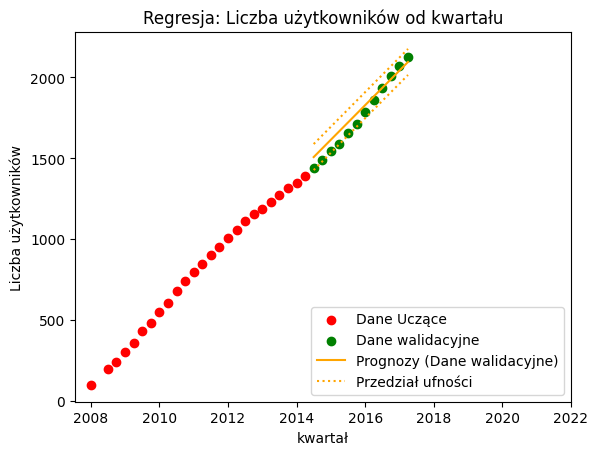

wspolczynnik ME -4.636778971944068
wspolczynnik RMSE 45.94106646357928
wspolczynnik MAE 39.09421164915663
wspolczynnik MPE -0.006186082487079557
wspolczynnik MAPE 0.02037214433697467


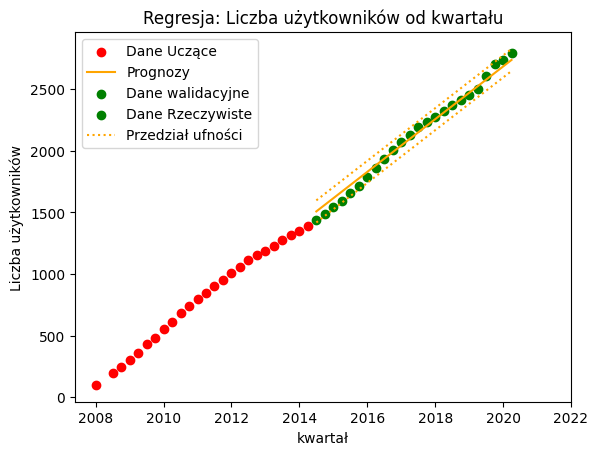

wspolczynnik ME -45.13538018757832
wspolczynnik RMSE 108.83994436697394
wspolczynnik MAE 75.1854244656443
wspolczynnik MPE -0.018064473065309904
wspolczynnik MAPE 0.029983378481464523
[1441 1490 1545 1591 1654 1712 1788 1860 1936 2006 2072 2129 2196 2234
 2271 2320 2375 2414 2449 2498 2603 2701 2740 2797 2853 2895 2910 2912
 2936 2934 2958 2963 2989 3030 3049 3065]


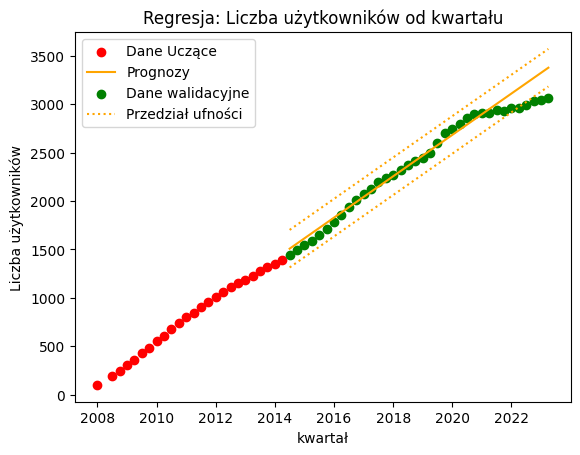

In [29]:

# dane uczące to do q4 14 wlacznie

X_uczace = data_user_count_q[["Q"]][:25]
Y_uczace = data_user_count_q["User count"][:25]
X_walidacyjne = data_user_count_q[["Q"]][25:]
Y_walidacyjne = data_user_count_q["User count"][25:]

# trenowanie modelu
model = LinearRegression()
model.fit(X_uczace, Y_uczace)

# prognozy dla danych walidacyjnych
Y_pred = model.predict(X_walidacyjne)

#wyswietl R^2 modelu
print("Współczynniki modelu R^2: ", model.score(X_uczace, Y_uczace))


# wyswietli parametry predykcji
print("Współczynnik ME", calculate_me(Y_walidacyjne, Y_pred))
print("Współczynnik RMSE", calculate_rmse(Y_walidacyjne, Y_pred))
print("Współczynnik MAE", calculate_mae(Y_walidacyjne, Y_pred))
print("Współczynnik MPE", calculate_mpe(Y_walidacyjne, Y_pred))
print("Współczynnik MAPE", calculate_mape(Y_walidacyjne, Y_pred) ,"\n")


# wykres
plt.scatter(X_uczace, Y_uczace, color='red', label='Dane Uczące')
plt.scatter(X_walidacyjne, Y_walidacyjne, color='green', label='Dane walidacyjne')
plt.plot(X_walidacyjne, Y_pred, color='orange', label='Prognozy (Dane walidacyjne)')
# proste regresji liniowej +- 0.95 odchylenia t-studenta
# dwie proste nie errorbar
plt.plot(X_walidacyjne, Y_pred + 1.96 * np.std(Y_walidacyjne - Y_pred), color='orange', linestyle='dotted', label='Przedział ufności')
plt.plot(X_walidacyjne, Y_pred - 1.96 * np.std(Y_walidacyjne - Y_pred), color='orange', linestyle='dotted')
plt.legend()
plt.xlabel("kwartał")
plt.ylabel("Liczba użytkowników")
plt.title("Regresja: Liczba użytkowników od kwartału")
plt.xticks(ticks=np.arange(1, 64, 8), labels=['2008', '2010', '2012', '2014', '2016', '2018', '2020', '2022'])

plt.show()
# dodaj na osi x lata 2008-2017

# Przygotowanie danych do predykcji dla lat 2018-2020 oraz y_pred (poprzednia predykcja)


X_future = list(range(27, 51))
# połacz dane
X_future = pd.DataFrame(X_future, columns=["Q"])
Y_future = model.predict(X_future)

dane_walidacyjne_2014_2020 = np.concatenate((Y_walidacyjne, data_future1["User count"][:12]))

print("wspolczynnik ME", calculate_me(dane_walidacyjne_2014_2020, Y_future))
print("wspolczynnik RMSE", calculate_rmse(dane_walidacyjne_2014_2020, Y_future))
print("wspolczynnik MAE", calculate_mae(dane_walidacyjne_2014_2020, Y_future))
print("wspolczynnik MPE", calculate_mpe(dane_walidacyjne_2014_2020, Y_future))
print("wspolczynnik MAPE", calculate_mape(dane_walidacyjne_2014_2020, Y_future))




plt.scatter(X_uczace, Y_uczace, color='red', label='Dane Uczące')
plt.plot(X_future, Y_future, color='orange', label='Prognozy')
plt.scatter(X_walidacyjne, Y_walidacyjne, color='green', label='Dane walidacyjne')
plt.scatter(data_future1["Q"][:12], data_future1["User count"][:12], color='green', label='Dane Rzeczywiste')
# 95% przedział ufności
plt.plot(X_future, Y_future + 1.96 * np.std(dane_walidacyjne_2014_2020 - Y_future), color='orange', linestyle='dotted', label='Przedział ufności')
plt.plot(X_future, Y_future - 1.96 * np.std(dane_walidacyjne_2014_2020 - Y_future), color='orange', linestyle='dotted')
plt.legend()
plt.xlabel("kwartał")
plt.ylabel("Liczba użytkowników")
plt.title("Regresja: Liczba użytkowników od kwartału")
plt.xticks(ticks=np.arange(1, 64, 8), labels=['2008', '2010', '2012', '2014', '2016', '2018', '2020', '2022'])

plt.show()

## Predykcja dla lat 2020-2023
X_future_2014_2023 = list(range(27, 75))
X_future_2014_2023 = pd.DataFrame(X_future_2014_2023, columns=["Q"])
Y_future_2014_2023 = model.predict(X_future_2014_2023)

# połączenie danych rzeczywistych z lat 2014-2023

All_Walidacyjne_Y = np.concatenate((Y_walidacyjne, data_future1["User count"]))
dane_walidacyjne_2014_2023 = np.concatenate((Y_walidacyjne, data_future1["User count"]))
print("wspolczynnik ME", calculate_me(dane_walidacyjne_2014_2023, Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)]))
print("wspolczynnik RMSE", calculate_rmse(dane_walidacyjne_2014_2023, Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)]))
print("wspolczynnik MAE", calculate_mae(dane_walidacyjne_2014_2023, Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)]))
print("wspolczynnik MPE", calculate_mpe(dane_walidacyjne_2014_2023, Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)]))
print("wspolczynnik MAPE", calculate_mape(dane_walidacyjne_2014_2023, Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)]))

# wykres
plt.scatter(X_uczace, Y_uczace, color='red', label='Dane Uczące')
plt.plot(X_future_2014_2023[:len(dane_walidacyjne_2014_2023)], Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)], color='orange', label='Prognozy')
plt.scatter(X_future_2014_2023[:len(dane_walidacyjne_2014_2023)], dane_walidacyjne_2014_2023, color='green', label='Dane walidacyjne')
# 95% przedział ufności
plt.plot(X_future_2014_2023[:len(dane_walidacyjne_2014_2023)], Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)] + 1.96 * np.std(dane_walidacyjne_2014_2023 - Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)]), color='orange', linestyle='dotted', label='Przedział ufności')
plt.plot(X_future_2014_2023[:len(dane_walidacyjne_2014_2023)], Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)] - 1.96 * np.std(dane_walidacyjne_2014_2023 - Y_future_2014_2023[:len(dane_walidacyjne_2014_2023)]), color='orange', linestyle='dotted')
print(dane_walidacyjne_2014_2023)
plt.legend()
plt.xlabel("kwartał")
plt.ylabel("Liczba użytkowników")
plt.title("Regresja: Liczba użytkowników od kwartału")

#dodanie na osi x lat 2008-2023
plt.xticks(ticks=np.arange(1, 64, 8), labels=['2008', '2010', '2012', '2014', '2016', '2018', '2020', '2022'])
plt.show()